<a href="https://colab.research.google.com/github/bforoura/GENAI26/blob/main/Module3/Prompt_Chaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Chaining in GPT-2**


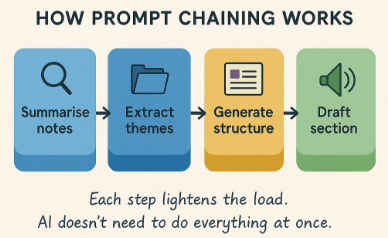


* This example creates a **Creative Writing Chain.**

  * **Prompt 1**: Generate a title based on a theme.

  * **Prompt 2**: Use that title to generate an opening sentence.




In [2]:
# Install the necessary libraries
!pip install langchain-huggingface langchain-core transformers torch



In [9]:
import torch
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate

# Wrap GPT-2 in a LangChain-compatible object
llm = HuggingFacePipeline.from_model_id(
    model_id="gpt2",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 50, "pad_token_id": 50256}
)



# Create the two Modular Prompts
template1 = PromptTemplate.from_template("Theme: {theme}\nTitle:")
template2 = PromptTemplate.from_template("Title: {generated_title}\nIn the world of music where")



# 3. Chain them using the "Pipe" operator (|)
# one big chain fails for GPT-2 so we do some minor adjustmen
chain1 = template1 | llm
chain2 = template2 | llm



# Execute
theme_input = "Beethoven's Piano Music"
title_output = chain1.invoke({"theme": theme_input})


# (Clean the title)
clean_title = title_output.split("Title:")[-1].strip()


final_story = chain2.invoke({"generated_title": clean_title})
print(final_story)



Device set to use cpu


Title: Beethoven's
In the world of music where music can be seen as "the most significant source of knowledge, the most powerful instrument of the whole of music, the most important source of musical expression", Beethoven was the first master of the great French composer to have a master's degree in


# **Analysis**

* The output you seeing is a classic example of **Model Collapse** or **Degeneration**, which is very common with older, smaller models like GPT-2.


* Because **GPT-2 is much less intelligent** than modern models like GPT-4 or Gemini, it is highly susceptible to certain failures when asked to perform a chain.

* To stop the repetition and get better results from GPT-2, we could create a generator for the LLM to include parameters such as **Penalty** and **Sampling**:



```
step2_output = generator(
    story_prompt,
    max_new_tokens=50,
    do_sample=True,          # Stops it from picking the same word
    temperature=0.8,         # Adds randomness/creativity
    repetition_penalty=1.5,  # Forces the model to try new words
    top_p=0.9                # Limits the pool of words to the most sensible ones
)
```

